# TDx Data Pull

**Author:** Eric Englin

**Date:** 10/10/23

**Description:** This code will pull the latest NPS API for the TDx feed. It will create a quick summary figure of the data. 

In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
#pull API using API key
response_API = requests.get('https://developer.nps.gov/api/v1/roadevents?type=workzone&api_key=pAVN008JKe6w3BaWr6FmH8jPFbzkAbKkv6ZpditQ')
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [75]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


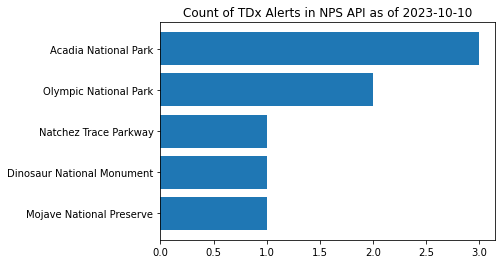

In [74]:
#create a quick summary figure

# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

# Create the plot
plt.barh(park_df['park'], park_df['number of alerts'])

# Set the title
plt.title("Count of TDx Alerts in NPS API as of " + today_string)

# Show the chart
plt.show()



In [38]:
# Loop through the API entries
counter=0
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
    print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    print("")
    counter+=1

Park: Mojave National Preserve
Alert name:  Cima Road Closed to ALL VEHICLES due to Construction
Description:  Cima Road is undergoing a major renovation for visitor and wildlife safety upgrades. Please do not drive around barricades or cross this active construction zone.
Event type:  work-zone
Road name:  ['Cima Road']
Vehicle impact:  all-lanes-closed
Dates:  2023-07-26T09:54:00Z to  2024-03-31T09:49:00Z

Park: Acadia National Park
Alert name:  Expect carriage road construction between intersections 10 and 11
Description:  Watch for heavy equipment and rough surfaces on carriage road between intersections 10 and 11 near Gilmore Meadow through October. Horses and carriages should avoid the area, which may be impassable at times. Bikers will need to dismount and walk.
Event type:  work-zone
Road name:  ['Carriage Road between intersections 10 and 11']
Vehicle impact:  unknown
Dates:  2023-09-29T02:48:00Z to  2023-10-31T02:48:00Z

Park: Acadia National Park
Alert name:  Blasting and he